In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


Load the Data Set

In [2]:
customer_fit_df = pd.read_csv('../input/cardiogoodfitness/CardioGoodFitness.csv')

In [3]:
customer_fit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
customer_fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
## The info() method in pandas prints the summary of a dataframe and returns None
## More Info https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

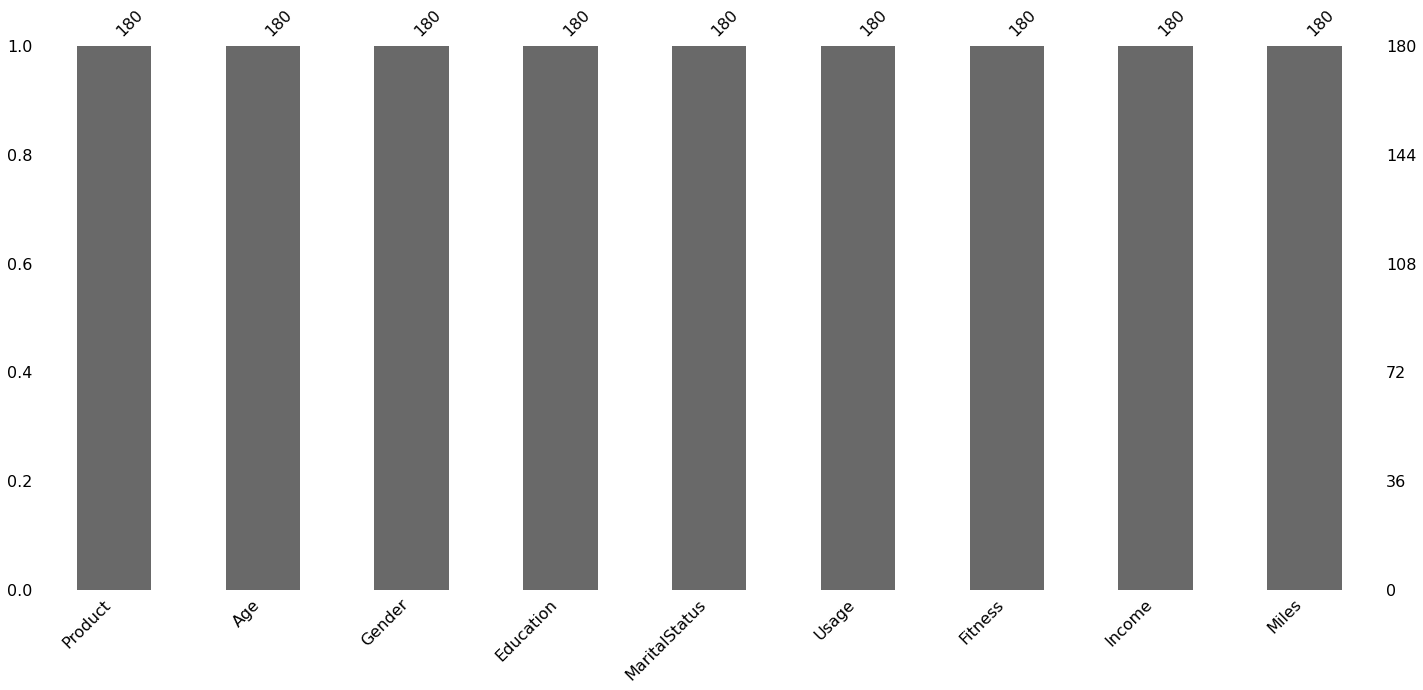

In [6]:
p=msno.bar(customer_fit_df)

In [7]:
customer_fit_df.describe(include='all')


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [8]:
#By Default, the describe method omits the non numeric values when .describe() method is called. 
#include='all' here, also includes categorical value.

#Following observations can be made :
#    1. No value is null (Or values like Age, income,are all > 0 indicating that all are genuine values)
#    2. TM195 is the highest purchased product (In the describe method, if multiple categories are highest, arbitrarily one of them is chosen)
#    3. freq is the frequency of the 'top' value mentioned above
#    4. More number of Males are present in the data than female
#    5. Marital Status that is highest in the data is Parterned

#    For more info on .descibe() method, refer : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

Let's check Data Distribution productwise (We have deduced from Above data that TM195 is max, let's check for other products)

<BarContainer object of 3 artists>

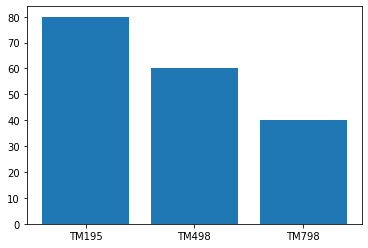

In [9]:
product_names=customer_fit_df['Product'].unique()
product_count=customer_fit_df['Product'].value_counts()
plt.bar(product_names,product_count)

<BarContainer object of 2 artists>

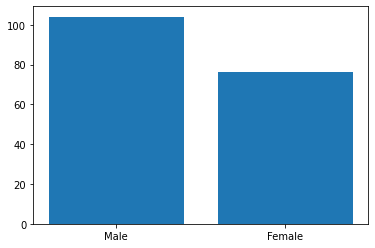

In [10]:
gender_type = customer_fit_df['Gender'].unique()
gender_distibution =customer_fit_df['Gender'].value_counts()
plt.bar(gender_type, gender_distibution)

Normal Distributiun for Education

In [11]:
customer_fit_df['Education'].nunique()

8

There are 8 unique years of education, these can be plotted on a bar plot

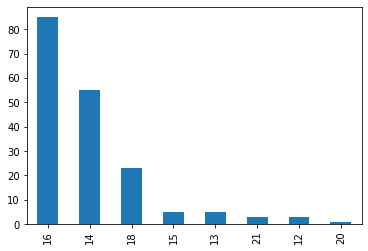

In [12]:
customer_fit_df['Education'].value_counts().plot(kind='bar')

<BarContainer object of 2 artists>

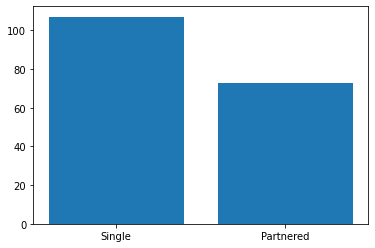

In [13]:
marital_status = customer_fit_df['MaritalStatus'].unique()
marital_status_values = customer_fit_df['MaritalStatus'].value_counts()
plt.bar(marital_status,marital_status_values)

(array([23., 26., 48., 41., 15.,  5.,  3.,  5., 10.,  4.]),
 array([ 29562. ,  37063.9,  44565.8,  52067.7,  59569.6,  67071.5,
         74573.4,  82075.3,  89577.2,  97079.1, 104581. ]),
 <a list of 10 Patch objects>)

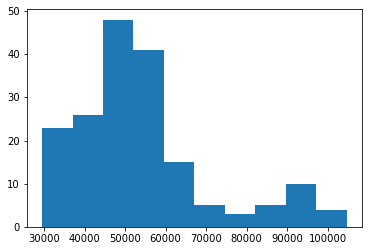

In [14]:
plt.hist(customer_fit_df['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f47065fe190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f47065fec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4706674c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4706605710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4706605c50>],
 'means': []}

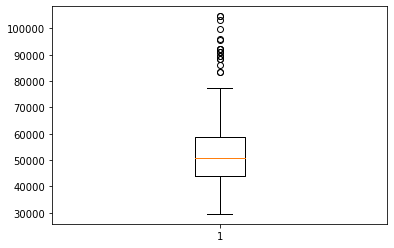

In [15]:
plt.boxplot(customer_fit_df['Income'])

In [16]:
customer_fit_df_copy = customer_fit_df.copy(deep=True) 
lower_bound = customer_fit_df_copy.quantile(0.25)
upper_bound = customer_fit_df_copy.quantile(0.75)
IQR = upper_bound - lower_bound
customer_fit_df = customer_fit_df_copy[~((customer_fit_df_copy < lower_bound- 1.5* IQR ) |  (customer_fit_df_copy > upper_bound+ 1.5* IQR )).any(axis=1)]

<BarContainer object of 4 artists>

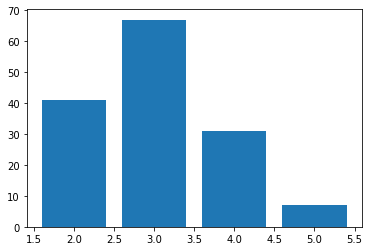

In [17]:
usage_measures = customer_fit_df['Usage'].unique()
usage_measures_values = customer_fit_df['Usage'].value_counts()
plt.bar(usage_measures,usage_measures_values)

<BarContainer object of 4 artists>

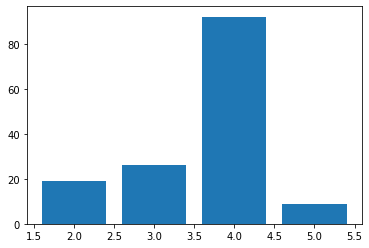

In [18]:
Fitness_measure = customer_fit_df['Fitness'].unique()
Fitness_measures_values = customer_fit_df['Fitness'].value_counts()
plt.bar(Fitness_measure,Fitness_measures_values)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(customer_fit_df['MaritalStatus'])

LabelEncoder()

In [20]:
customer_fit_df['MaritalStatus'] = le.transform(customer_fit_df['MaritalStatus'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
le1 = LabelEncoder()
le1.fit(customer_fit_df['Product'])
customer_fit_df['Product'] = le1.transform(customer_fit_df['Product'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
le1 = LabelEncoder()
customer_fit_df['Gender'] = le1.fit_transform(customer_fit_df['Gender'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
customer_fit_df['Gender']

0      1
1      1
2      0
3      1
4      1
      ..
150    1
151    1
153    1
158    1
165    1
Name: Gender, Length: 146, dtype: int64

In [24]:
customer_fit_df['Product']

0      0
1      0
2      0
3      0
4      0
      ..
150    2
151    2
153    2
158    2
165    2
Name: Product, Length: 146, dtype: int64

In [25]:
customer_fit_df.head(50)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,1,14,1,3,4,29562,112
1,0,19,1,15,1,2,3,31836,75
2,0,19,0,14,0,4,3,30699,66
3,0,19,1,12,1,3,3,32973,85
4,0,20,1,13,0,4,2,35247,47
5,0,20,0,14,0,3,3,32973,66
6,0,21,0,14,0,3,3,35247,75
7,0,21,1,13,1,3,3,32973,85
8,0,21,1,15,1,5,4,35247,141
9,0,21,0,15,0,2,3,37521,85


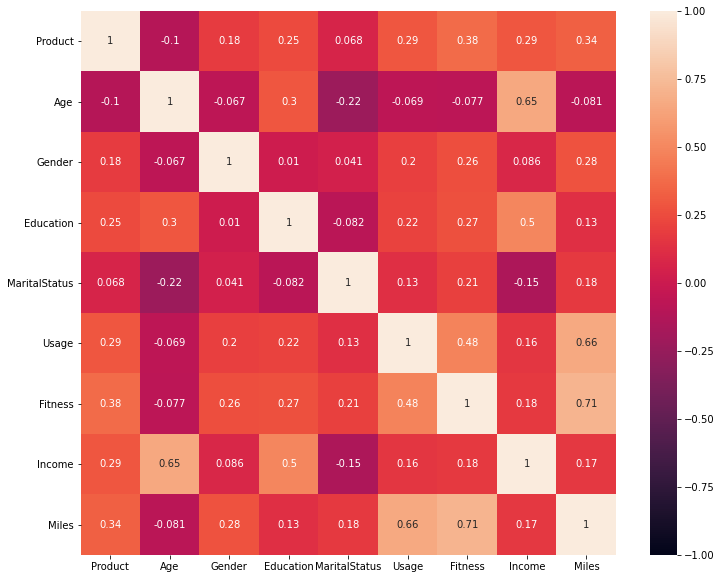

In [26]:
plt.figure(figsize=(12,10))
p = sns.heatmap(customer_fit_df.corr(), annot=True, vmin=-1, vmax=1)

No 2 variables have high enough correalation > 0.95 that we remove them

In [27]:
X = customer_fit_df
X.head()
X = customer_fit_df.iloc[:,1:]
Y = customer_fit_df.iloc[:,0].to_frame()
Y.head()


,Product
0,0
1,0
2,0
3,0
4,0


In [28]:
customer_fit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,1,14,1,3,4,29562,112
1,0,19,1,15,1,2,3,31836,75
2,0,19,0,14,0,4,3,30699,66
3,0,19,1,12,1,3,3,32973,85
4,0,20,1,13,0,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
150,2,25,1,16,0,4,5,49801,120
151,2,25,1,16,0,4,4,62251,160
153,2,25,1,18,0,4,3,64741,100
158,2,26,1,16,0,5,4,64741,180


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.3)

In [30]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


In [31]:
X_train

array([[ 7.14624590e-01, -1.10335457e+00,  5.98796530e-01,
        -8.53705780e-01,  2.14722931e+00, -3.13265745e-02,
         5.04271488e-01,  1.83421356e-01],
       [-9.98642055e-01,  9.06326967e-01, -9.67286702e-01,
         1.17136375e+00,  9.16794537e-01, -3.13265745e-02,
        -2.75299864e-02,  5.48312776e-01],
       [-5.31387516e-01, -1.10335457e+00, -9.67286702e-01,
        -8.53705780e-01, -3.13640236e-01, -3.13265745e-02,
        -1.01338158e+00, -1.48298117e-01],
       [-2.19884489e-01,  9.06326967e-01,  5.98796530e-01,
         1.17136375e+00,  9.16794537e-01, -3.13265745e-02,
         6.30742577e-01, -1.48298117e-01],
       [-3.75636002e-01, -1.10335457e+00,  5.98796530e-01,
         1.17136375e+00,  9.16794537e-01,  1.56632872e+00,
         1.24858221e-01,  1.24492367e+00],
       [-6.87139029e-01, -1.10335457e+00,  5.98796530e-01,
         1.17136375e+00,  9.16794537e-01, -3.13265745e-02,
        -2.54555046e-01, -4.80017590e-01],
       [-5.31387516e-01, -1.103354

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=4)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[18  6  0]
 [12  2  0]
 [ 0  3  3]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        24
           1       0.18      0.14      0.16        14
           2       1.00      0.50      0.67         6

    accuracy                           0.52        44
   macro avg       0.59      0.46      0.50        44
weighted avg       0.52      0.52      0.51        44



In [35]:
Expected = Y_test['Product'].values

In [36]:
X_test[6]

array([-0.53138752,  0.90632697,  0.59879653,  1.17136375, -0.31364024,
        1.56632872, -0.88691049,  0.78051641])

In [37]:
my_submission = pd.DataFrame({'Predicted': y_pred, 'Expected' :Expected})
my_submission.to_csv('./submission.csv', index=False)
